In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


In [0]:
pip install pandas folium


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
pip install geopy

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import folium
from geopy.geocoders import Nominatim

In [0]:
covid_df=pd.read_csv("https://grad2.blob.core.windows.net/after2/covid-19.csv")

In [0]:
covid_df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,CASES per Test,Death in Closed Cases,Rank by Testing rate,Rank by Death rate,Rank by Cases rate,Rank by Death of Closed Cases
0,World,22849844.0,267351.0,796376.0,6186.0,15508345.0,6545123.0,61822.0,2931.0,102.2,NaN,NaN,NaN,4.88%,NaN,52.0,80.0,61.0
1,USA,5746272.0,45341.0,177424.0,1090.0,3095484.0,2473364.0,16817.0,17346.0,536.0,73868332.0,222984.0,3.312722e+08,5.42%,19.0,10.0,8.0,53.0
2,Brazil,3505097.0,44684.0,112423.0,1234.0,2653407.0,739267.0,8318.0,16474.0,528.0,13748152.0,64616.0,2.127684e+08,4.06%,71.0,11.0,10.0,82.0
3,India,2904329.0,68507.0,54975.0,981.0,2157941.0,691413.0,8944.0,2102.0,40.0,32661252.0,23636.0,1.381864e+09,2.48%,123.0,87.0,90.0,121.0
4,Russia,942106.0,4785.0,16099.0,110.0,755513.0,170494.0,2300.0,6455.0,110.0,33500000.0,229541.0,1.459433e+08,2.09%,17.0,49.0,39.0,140.0


In [0]:
covid_df.isna().sum()

Country                            0
TotalCases                         0
NewCases                          55
TotalDeaths                       24
NewDeaths                        108
TotalRecovered                     1
ActiveCases                        0
SeriousCritical                   87
Tot Cases/1M pop                   2
Deaths/1M pop                     26
TotalTests                        21
Tests/1M pop                      21
CASES per Test                     3
Death in Closed Cases             24
Rank by Testing rate              21
Rank by Death rate                26
Rank by Cases rate                 2
Rank by Death of Closed Cases     24
dtype: int64

In [0]:
covid_df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,CASES per Test,Rank by Testing rate,Rank by Death rate,Rank by Cases rate,Rank by Death of Closed Cases
count,2.160000e+02,161.000000,192.000000,108.000000,2.150000e+02,2.160000e+02,129.000000,214.000000,190.000000,1.950000e+02,1.950000e+02,2.130000e+02,195.000000,190.000000,214.000000,192.000000
mean,2.115726e+05,3321.130435,8295.583333,114.555556,1.433062e+05,5.787469e+04,958.480620,3666.827103,106.904632,2.067556e+06,1.122146e+05,3.647264e+07,97.994872,94.684211,107.471963,96.442708
std,1.627893e+06,22209.022211,59622.231889,620.958474,1.100877e+06,4.794329e+05,5717.165249,5626.856265,180.993179,9.067132e+06,2.375200e+05,1.416657e+08,56.427629,54.272341,61.892582,55.665294
min,3.000000e+00,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000e+00,8.010000e+02,1.000000,1.000000,1.000000,1.000000
25%,7.532500e+02,32.000000,27.000000,2.000000,3.335000e+02,1.005000e+02,3.000000,327.250000,8.000000,2.957750e+04,1.130050e+04,8.720360e+05,49.500000,48.250000,54.250000,48.750000
50%,4.785500e+03,129.000000,127.500000,5.000000,2.765000e+03,9.865000e+02,24.000000,1331.500000,32.500000,1.497480e+05,4.199100e+04,6.883928e+06,98.000000,95.000000,107.500000,96.500000
75%,4.236600e+04,605.000000,938.750000,16.000000,2.779450e+04,5.941000e+03,151.000000,4438.000000,110.750000,8.672120e+05,1.067600e+05,2.554018e+07,146.500000,141.000000,160.750000,144.250000
max,2.284984e+07,267351.000000,796376.000000,6186.000000,1.550834e+07,6.545123e+06,61822.000000,41393.000000,1237.000000,9.041000e+07,1.778642e+06,1.439324e+09,195.000000,190.000000,214.000000,192.000000


In [0]:
x=covid_df.dtypes
print(x)

Country                           object
TotalCases                       float64
NewCases                         float64
TotalDeaths                      float64
NewDeaths                        float64
TotalRecovered                   float64
ActiveCases                      float64
SeriousCritical                  float64
Tot Cases/1M pop                 float64
Deaths/1M pop                    float64
TotalTests                       float64
Tests/1M pop                     float64
CASES per Test                   float64
Death in Closed Cases             object
Rank by Testing rate             float64
Rank by Death rate               float64
Rank by Cases rate               float64
Rank by Death of Closed Cases    float64
dtype: object


/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


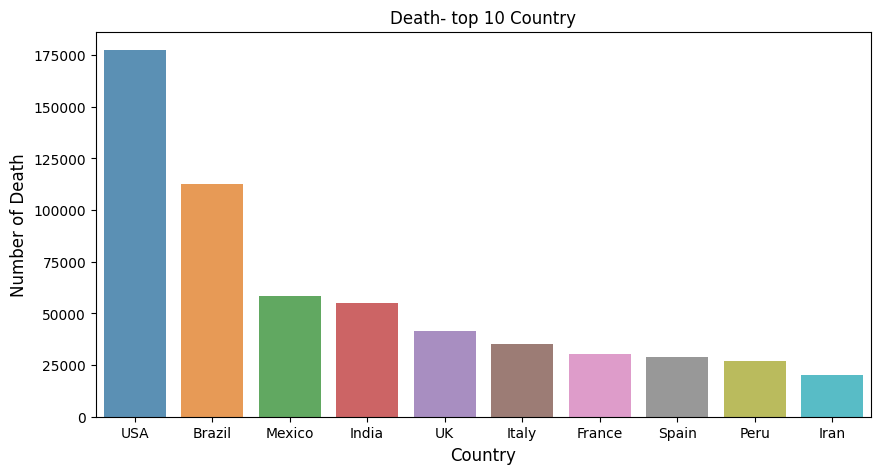

In [0]:
Country= covid_df[covid_df["Country"]!="World"].groupby("Country")["TotalDeaths"].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(Country.index, Country.values, alpha=0.8)
plt.title('Death- top 10 Country')
plt.ylabel('Number of Death', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [0]:
geolocator = Nominatim(user_agent="my_geocoder")

def get_coordinates(row):
    location = geolocator.geocode(row['Country'])
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

covid_df['Coordinates'] = covid_df.apply(get_coordinates, axis=1)


In [0]:
covid_df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,CASES per Test,Death in Closed Cases,Rank by Testing rate,Rank by Death rate,Rank by Cases rate,Rank by Death of Closed Cases,Coordinates
0,World,22849844.0,267351.0,796376.0,6186.0,15508345.0,6545123.0,61822.0,2931.0,102.2,NaN,NaN,NaN,4.88%,NaN,52.0,80.0,61.0,"(22.4880606, 113.9170834)"
1,USA,5746272.0,45341.0,177424.0,1090.0,3095484.0,2473364.0,16817.0,17346.0,536.0,73868332.0,222984.0,3.312722e+08,5.42%,19.0,10.0,8.0,53.0,"(39.7837304, -100.445882)"
2,Brazil,3505097.0,44684.0,112423.0,1234.0,2653407.0,739267.0,8318.0,16474.0,528.0,13748152.0,64616.0,2.127684e+08,4.06%,71.0,11.0,10.0,82.0,"(-10.3333333, -53.2)"
3,India,2904329.0,68507.0,54975.0,981.0,2157941.0,691413.0,8944.0,2102.0,40.0,32661252.0,23636.0,1.381864e+09,2.48%,123.0,87.0,90.0,121.0,"(22.3511148, 78.6677428)"
4,Russia,942106.0,4785.0,16099.0,110.0,755513.0,170494.0,2300.0,6455.0,110.0,33500000.0,229541.0,1.459433e+08,2.09%,17.0,49.0,39.0,140.0,"(40.2338211, -84.4096729)"


In [0]:
m = folium.Map(location=[20, 0], zoom_start=2)

for index, row in covid_df.iterrows():
    # Customize the popup content here by referencing the DataFrame columns.
    popup_text = f"{row['Country']} Deaths/1M pop: {row['Deaths/1M pop']} Rank by Death rate: {row['Rank by Death rate']} "
    
    folium.Marker(
        location=row['Coordinates'],
        popup=folium.Popup(popup_text, parse_html=True)
    ).add_to(m)

m
